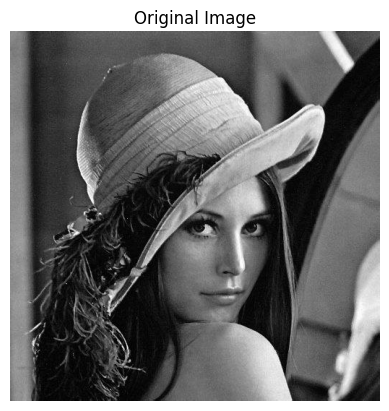

Image Size: Width=512, Height=512, Channels=3
Total Pixels: 262144


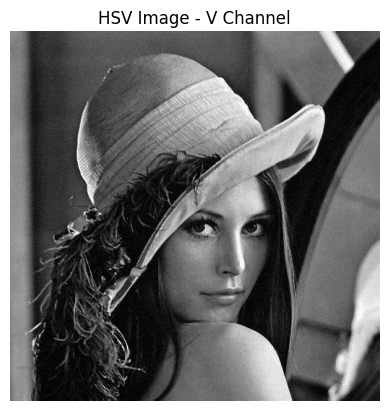

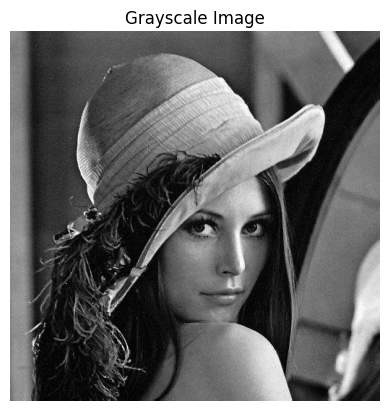

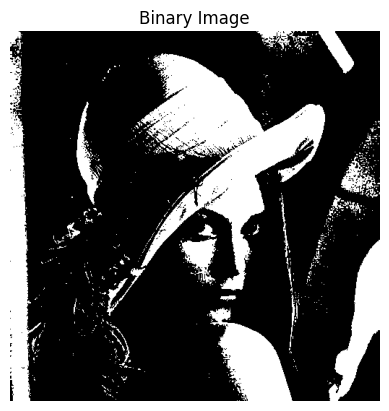

Black Pixel Count: 199095


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the image
image = cv2.imread("/content/img_1.jpg")  # Change the filename accordingly



# 2. Display the original image using matplotlib (since cv2.imshow() doesn't work in Colab)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

# 3. Extract Image Size
height, width, channels = image.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

# 4. Calculate Image Pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

# 5. Convert BGR to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imwrite("hsv_image.jpg", image_hsv)

# Display HSV image (only Value channel for visualization)
plt.imshow(image_hsv[:, :, 2], cmap='gray')  # Show Value (V) channel
plt.title("HSV Image - V Channel")
plt.axis("off")
plt.show()

# 6. Convert BGR to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("grayscale_image.jpg", gray_image)

# Display Grayscale Image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# 7. Convert Grayscale to Binary using a threshold
threshold_value = 127
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

# Display Binary Image
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

# 8. Count the area of black pixels
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixel_count}")


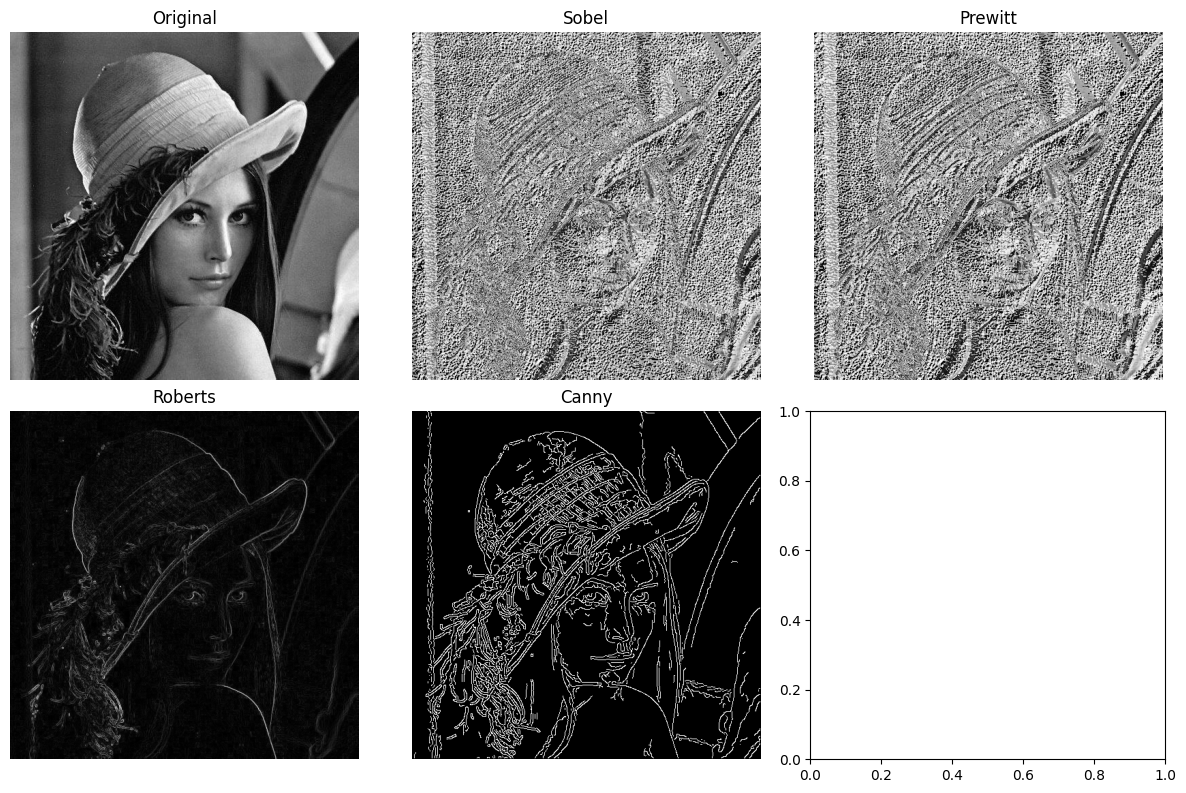

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, prewitt
from skimage.filters import roberts
from skimage.feature import canny

# Read the image in grayscale
image = cv2.imread("/content/img_1.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Sobel Operator
sobel_x = sobel(image, axis=0)  # Horizontal edges
sobel_y = sobel(image, axis=1)  # Vertical edges
sobel_edges = np.hypot(sobel_x, sobel_y)

# Apply Prewitt Operator
prewitt_x = prewitt(image, axis=0)
prewitt_y = prewitt(image, axis=1)
prewitt_edges = np.hypot(prewitt_x, prewitt_y)

# Apply Roberts Operator
roberts_edges = roberts(image)

# Apply Canny Edge Detector
canny_edges = canny(image, sigma=1)  # sigma controls edge sensitivity

# Plot Results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

titles = ['Original', 'Sobel', 'Prewitt', 'Roberts', 'Canny']
images = [image, sobel_edges, prewitt_edges, roberts_edges, canny_edges]

for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()
